In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/by_dataset/token_type.csv')
df = df.sort_values(by='WILD', ascending=False)
df = df[['token_type'] + sorted(df.columns[1:])]
df.iloc[:, 1:] /= df.iloc[:, 1:].sum(axis=0)

df_log = df.iloc[:, 1:-1].div(df.WILD, axis=0).apply(np.log)
df_log = df_log.replace([ -np.inf, np.inf ], np.nan)
df_log

,BIG,CVS,JLT,MNY,NTR,TBO,VDC
39,0.123635,0.023359,-0.210051,-0.023038,0.057002,-0.335962,0.121683
34,-0.724573,-0.480331,-1.503357,0.135859,-0.604858,-1.732499,-0.723307
35,-1.122984,-0.572820,-0.727959,-0.138802,-0.198050,0.172946,-1.038378
37,0.249548,0.171602,0.399204,0.079671,0.039491,-0.402105,0.232169
38,0.249510,0.171686,0.399282,0.075043,0.039568,-0.402027,0.232260
...,...,...,...,...,...,...,...
44,0.109786,NaN,NaN,NaN,NaN,NaN,-3.002357
43,NaN,0.987781,NaN,-4.734837,NaN,NaN,-1.290359
42,-0.252097,NaN,NaN,0.029768,NaN,NaN,0.279904
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN


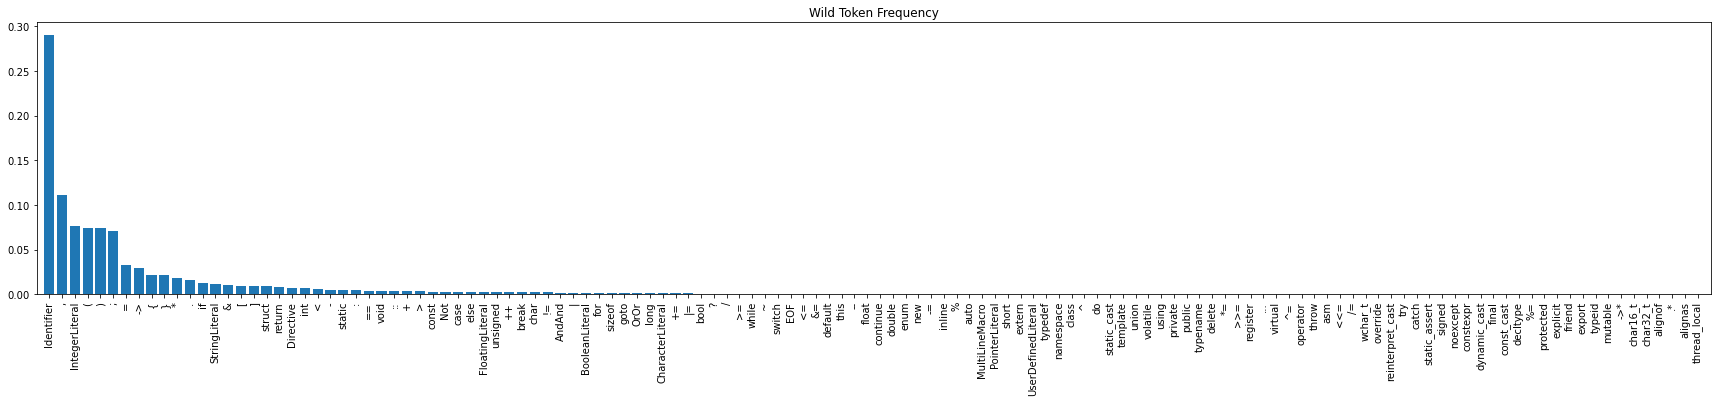

In [2]:
plt.figure(figsize=(30, 5))
plt.bar(df.token_type, df.WILD)
plt.xticks(rotation=90)
plt.xlim(-1, 130)
plt.title('Wild Token Frequency')
plt.savefig('img/wild-token-frequency.svg')
plt.show()

<ipython-input-3-509fe01485e1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.token_type, rotation=90, fontsize=14)


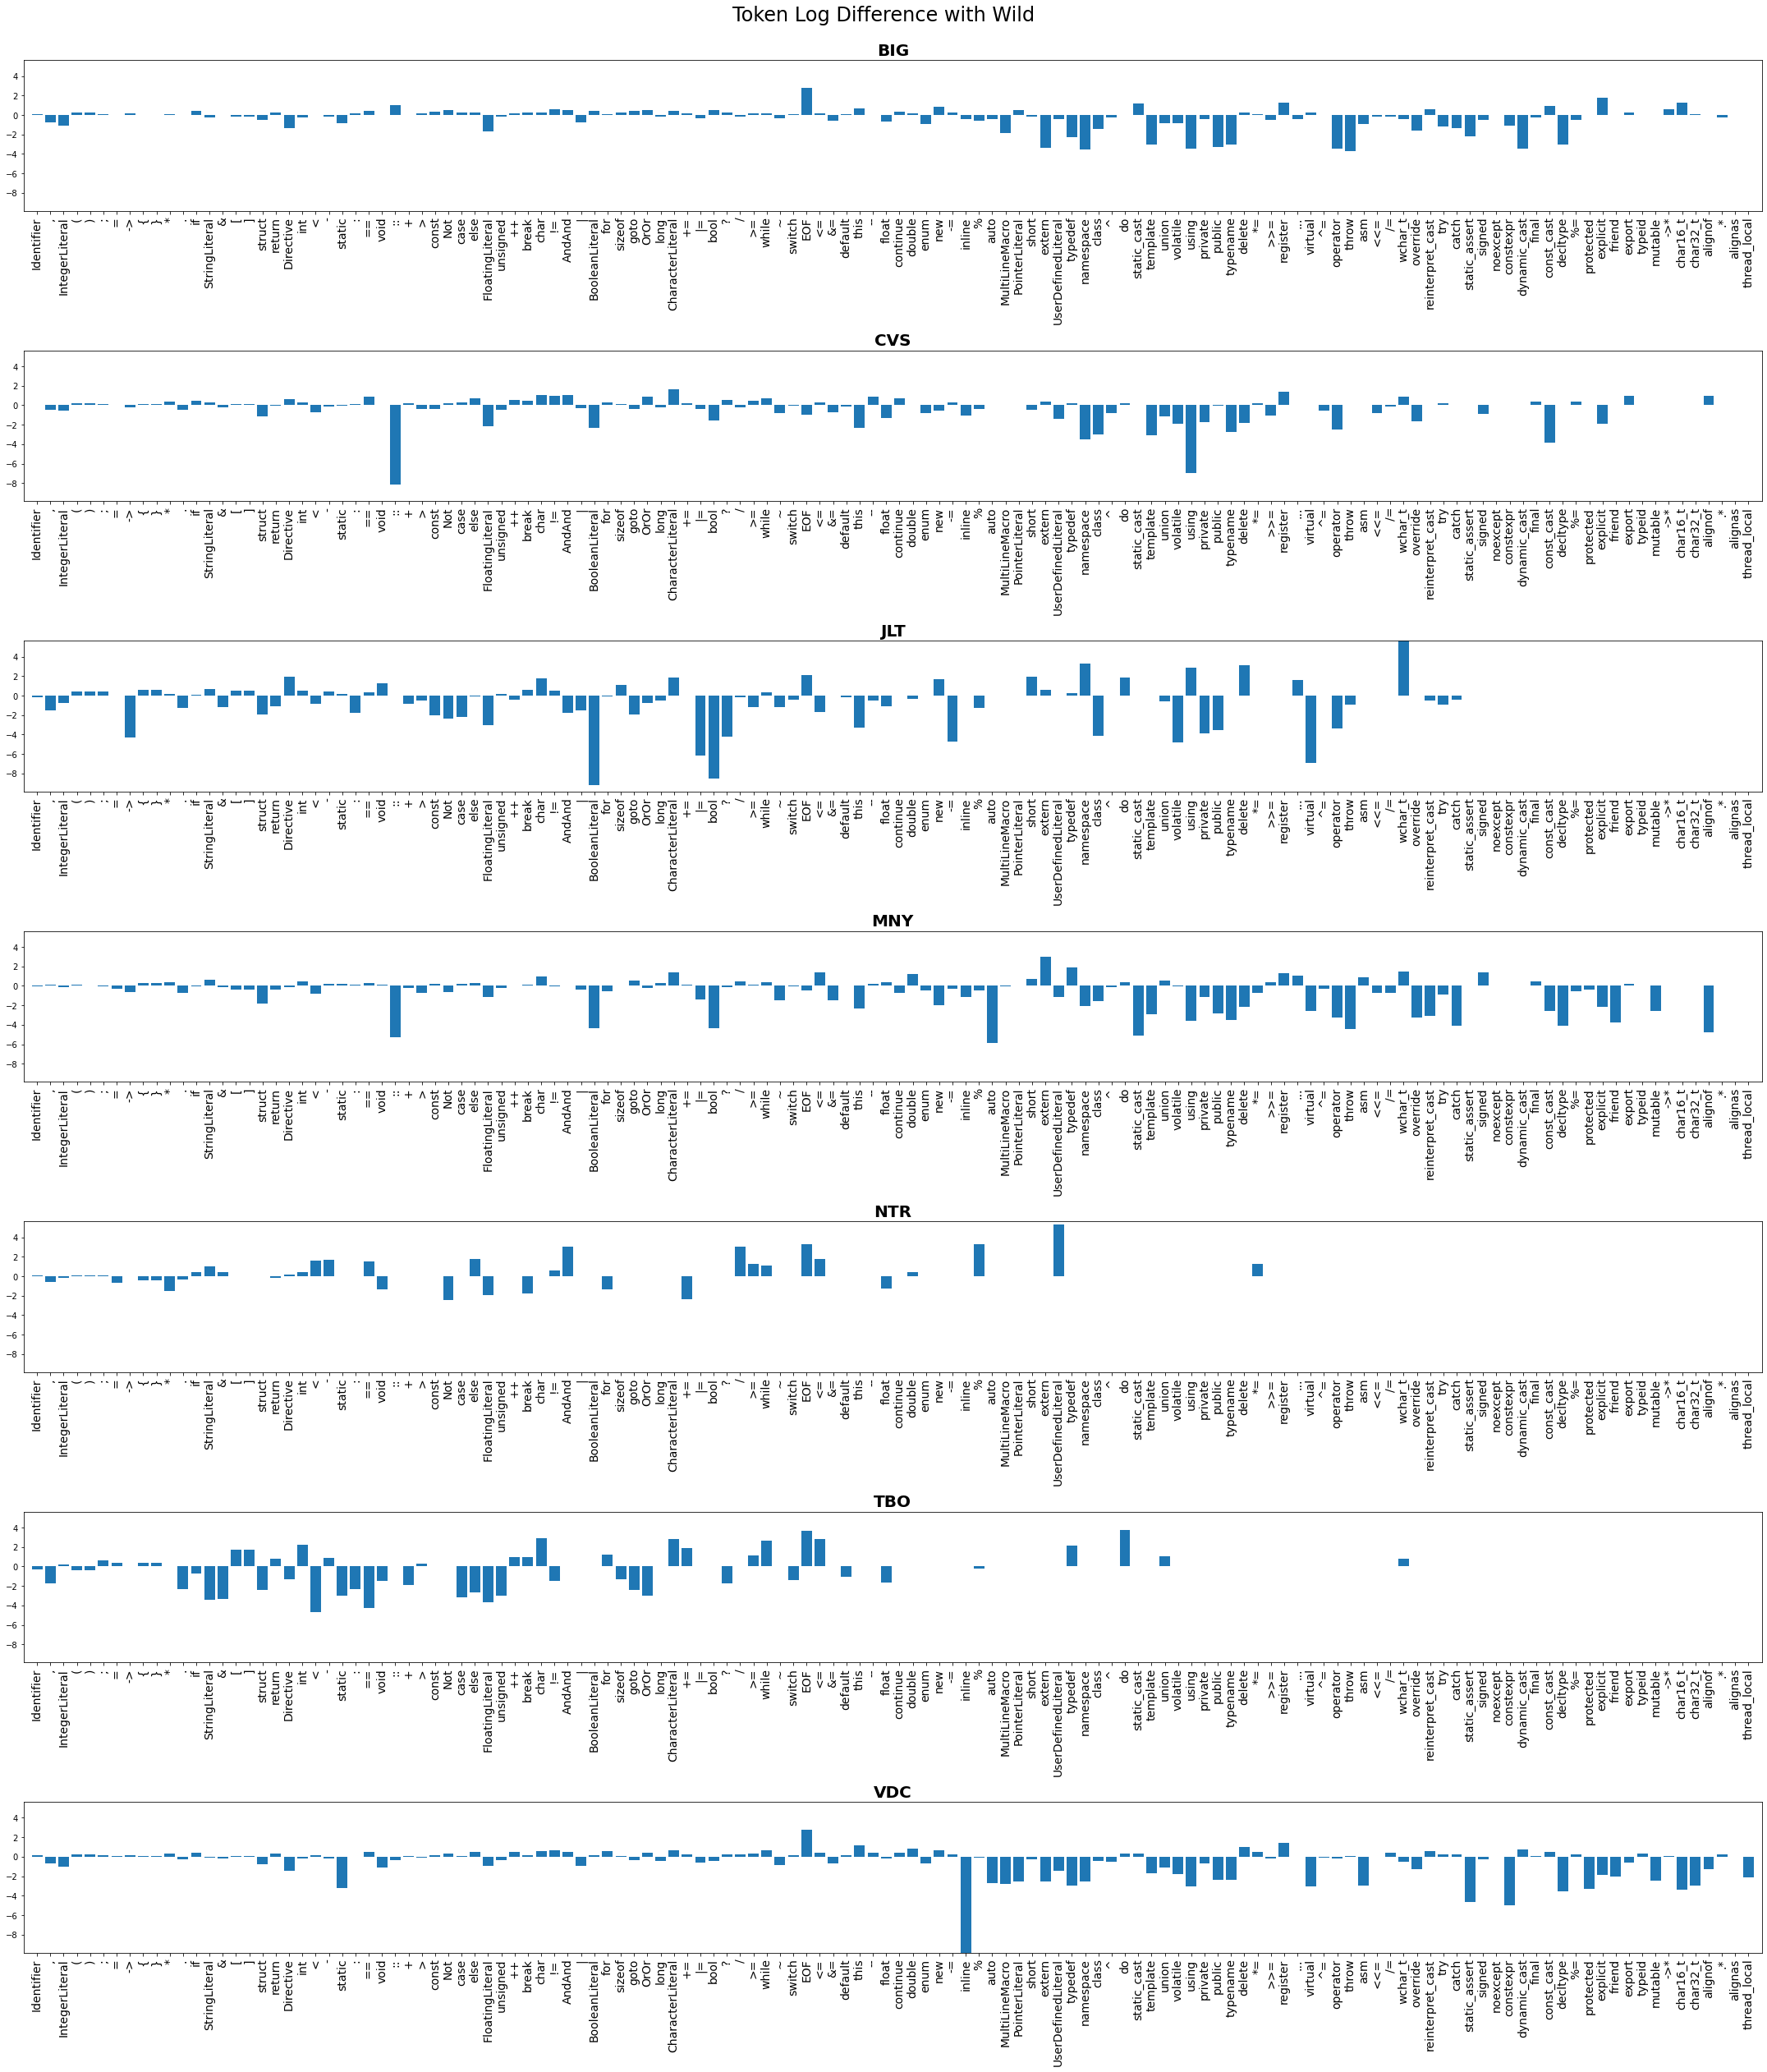

In [3]:
vals = df_log.values
vals = vals[~np.isnan(vals)]
y_min, y_max = vals.min(), vals.max()
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(30, 5 * 7))

for name, ax in zip(df.columns[1:-1], axes.ravel()):
    ax.bar(df.token_type, df_log[name])
    ax.set_title(name, fontweight='bold', fontsize=20)
    ax.set_xticklabels(df.token_type, rotation=90, fontsize=14)
    ax.set_xlim(-1, 130)
    ax.set_ylim(y_min, y_max)

fig.suptitle('Token Log Difference with Wild', fontsize=24, y=1.0)
fig.tight_layout()
plt.savefig('img/token-log-diff-with-wild.svg')
fig.show()

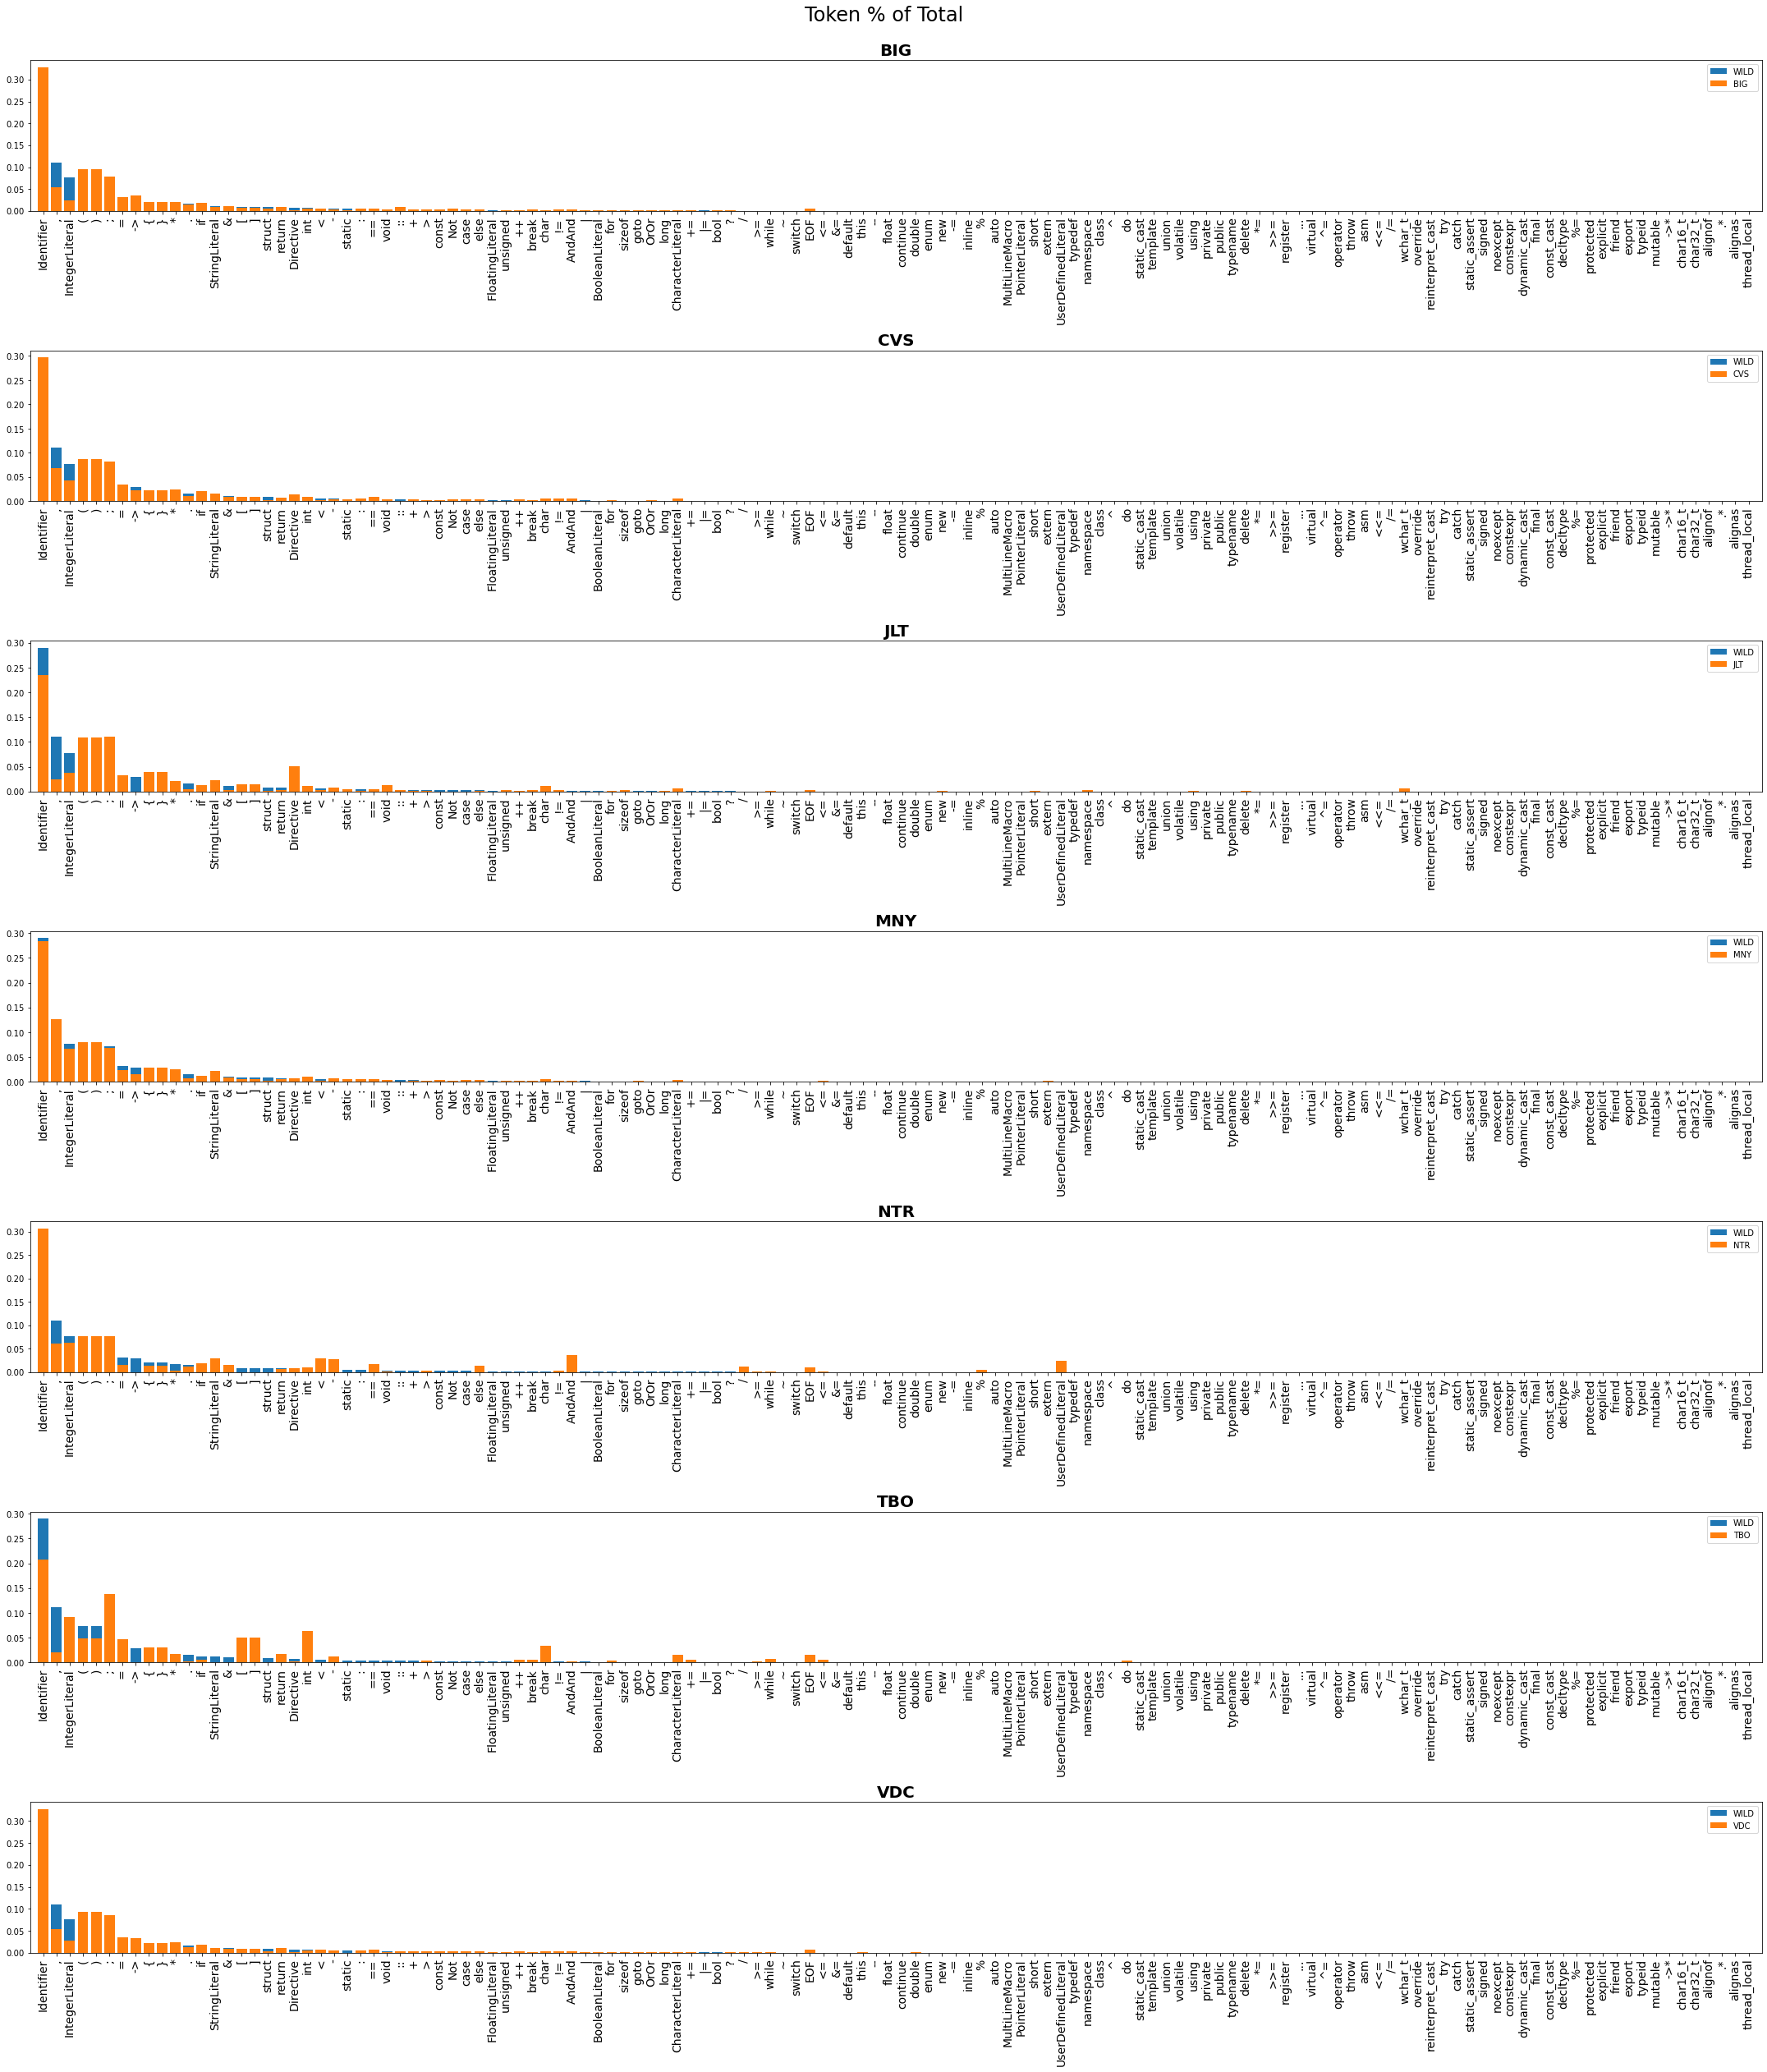

In [4]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(30, 5 * 7))

for name, ax in zip(df.columns[1:-1], axes.ravel()):
    ax.bar(df.token_type, df.WILD)
    ax.bar(df.token_type, df[name])
    ax.legend(['WILD', name])
    ax.set_title(name, fontweight='bold', fontsize=20)
    ax.set_xticks(df.token_type)
    ax.set_xticklabels(df.token_type, rotation=90, fontsize=14)
    ax.set_xlim(-1, 130)

fig.suptitle('Token % of Total', fontsize=24, y=1.0)
fig.tight_layout()
plt.savefig('img/token-perc-diff-with-wild.svg')
fig.show()

In [5]:
df_diff = df.iloc[:, 1:-1].subtract(df.WILD, axis=0).abs()

df_mets = pd.DataFrame()
df_mets['%diff-mean'] = df_diff.mean()
df_mets['%diff-sum'] = df_diff.sum()
df_mets['log diff-mean'] = df_log.abs().mean()
df_mets['log diff-sum'] = df_log.abs().sum()
df_mets['% missing'] = df_log.isna().sum() / df.shape[0]
df_mets = df_mets.sort_values(by='%diff-sum')
df_mets

,%diff-mean,%diff-sum,log diff-mean,log diff-sum,% missing
MNY,0.001340,0.174181,1.166431,138.805335,0.084615
CVS,0.001763,0.229231,0.883730,94.559072,0.176923
BIG,0.002080,0.270387,0.746850,91.115649,0.061538
VDC,0.002166,0.281543,0.969839,124.139361,0.015385
NTR,0.003478,0.452196,1.259958,50.398330,0.692308
JLT,0.004242,0.551475,1.696253,147.574010,0.330769
TBO,0.005633,0.732339,1.771733,99.217033,0.569231


In [6]:
def missing_red(val):
    color = '#81C784' if val else '#E57373'
    return f'background: {color}'

# Show all the rows
pd.set_option('display.max_rows', None)

# Find the missing, drop WILD
df_miss = df.iloc[:, :-1].set_index('token_type').sort_index()
df_miss = (df_miss > 0).astype(int)

# Sort rows by tokens which are the most missing
df_miss['total'] = df_miss.sum(axis=1)
df_miss = df_miss.sort_values(by='total', ascending=True)

# Sort cols by dataset with most missing
df_miss = df_miss[df_miss.sum(axis=0).sort_values(ascending=False).index]

# Display with color
df_miss.loc[df_miss.total < 7, :]

,total,VDC,BIG,MNY,CVS,JLT,TBO,NTR
token_type,,,,,,,,
noexcept,0,0,0,0,0,0,0,0
alignas,0,0,0,0,0,0,0,0
typeid,1,1,0,0,0,0,0,0
thread_local,1,1,0,0,0,0,0,0
mutable,2,1,0,1,0,0,0,0
friend,2,1,0,1,0,0,0,0
protected,2,1,0,1,0,0,0,0
dynamic_cast,2,1,1,0,0,0,0,0
->*,2,1,1,0,0,0,0,0


In [7]:
df_miss['wild'] = df[['token_type', 'WILD']].set_index('token_type')
pd.DataFrame((df_miss.iloc[:, 1:-1] == False).astype(int).multiply(df_miss.wild, axis=0).sum(axis=0) * 100, columns=['%'])

,%
VDC,0.001299
BIG,0.002444
MNY,0.018036
CVS,0.060595
JLT,0.317014
TBO,4.953771
NTR,9.931726
